# GHP Construction with Duration Matching

In [1]:
import pandas as pd
import numpy as np
import ashmodule as ash
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ash.bond_cash_flows(3,100,0.03,2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [5]:
ash.bond_price(20,1000,0.05,2,0.04)

1136.7773962036904

In [6]:
ash.bond_price(20,1000,0.05,2,0.05)

1000.0000000000023

In [7]:
ash.bond_price(20,1000,0.05,2,0.02)

1492.520291709342

In [8]:
ash.bond_price(20,1000,0.05,2,0.06)

884.4261401289671

In [9]:
rates = np.linspace(0.01, 0.10, num = 20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [11]:
prices = [ash.bond_price(10,1000,0.05,2, rate) for rate in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

In [14]:
rates_prices = pd.DataFrame(data = prices, index = rates)
rates_prices.columns = ["Prices"]
rates_prices

,Prices
0.010000,1379.748383
0.014737,1326.762928
0.019474,1276.163298
0.024211,1227.833538
0.028947,1181.663651
0.033684,1137.549279
0.038421,1095.391400
0.043158,1055.096038
0.047895,1016.573997
0.052632,979.740605


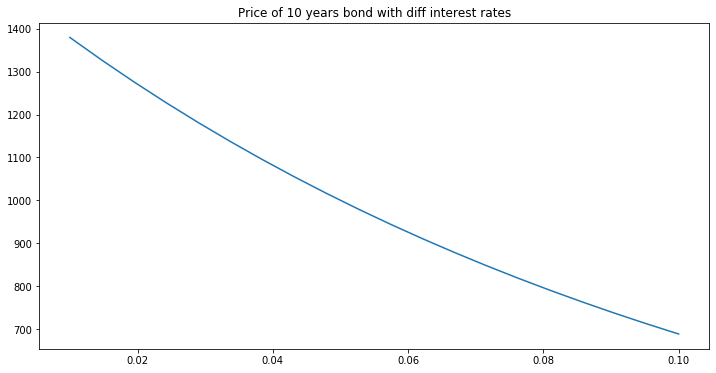

In [18]:
rates_prices.plot(figsize = (12,6), title = "Price of 10 years bond with diff interest rates", legend = False);

## Calculating the Disounted Payback Period (Macaulay duration)

Calculating time required to get your money back considering payments and other cashflows before principal payment

* FV = 1000
* I = 6%
* N = 3 years
* Simi-Annual payments



In [21]:
#clculate cash flows of the bond
cf = ash.bond_cash_flows(3, 1000,0.06,2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [26]:
#the discount rate for each period 
discounts = ash.discount(cf.index, 0.06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [27]:
#the discounted cash flows
dcf = discounts*cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [30]:
# calculate the weight for each discounted cashflow
weights = dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [31]:
# get the macualay duration / discounted payback period
dbp = (weights.index*weights).sum()
dbp

5.579707187194534

In [33]:
ash.macaulay_duration(ash.bond_cash_flows(3,1000,0.06,2),0.06/2)

5.579707187194534

## Duration Matching

In [38]:
liabilities = pd.Series(data = [100000,100000],index = [10,12])
liabilities

10    100000
12    100000
dtype: int64

In [39]:
ash.macaulay_duration(liabilities,0.04)

10.960799385088393

In [41]:
md_10 = ash.macaulay_duration(ash.bond_cash_flows(10,1000,0.05,1), 0.04)
md_20 = ash.macaulay_duration(ash.bond_cash_flows(20,1000,0.05,1), 0.04)

In [42]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

Therefore, we need to hold a portfolio of these two bonds that has a combined target duration that matches the duration of the liability, which is given by the following expression, where $w_s$ is the weight in the short duration bond whcih has duration $d_s$ and the duration of the longer bond is $d_l$. We designate the targeted duration as $d_t$.

In our case, the fraction in the short duration asset $w_s$ should be such that:

$$ w_s \times 8.19 + (1-w_s) \times 13.54 = 10.96 $$

more generally:

$$ w_s \times d_s + (1-w_s) \times d_l = d_t $$

rearranging gives:

$$ w_s = \frac{d_l -d_t}{d_l - d_s} $$



In [44]:
# cash flows for long bond and short bond
short_bond = ash.bond_cash_flows(10,1000,0.05,1)
long_bond = ash.bond_cash_flows(20,1000,0.05,1)
# weight of short bond in the portfolio 
w_s = ash.match_durations(liabilities,short_bond,long_bond,0.04)
w_s

0.48263092069478974

In [46]:
# wight of long bond
w_l = 1-w_s
w_l

0.5173690793052103

In [54]:
# price for each bond
p_short = ash.bond_price(10,1000,0.05,1,0.04)
p_long = ash.bond_price(20,1000,0.05,1,0.04)
 
# initial investment (asset at time 0) 130K
a_0 = 130000

# Calculate cash flows from the whole portfolio which is:
# the initial ivestment * weight of each asset * cash flows from the asset / price of the asset
p_flows = pd.concat([a_0*w_s*short_bond/p_short,
                     a_0*w_l*long_bond/p_long])
ash.macaulay_duration(p_flows,0.04)

10.960799385088393

In [58]:
p_flows

1      2901.743586
2      2901.743586
3      2901.743586
4      2901.743586
5      2901.743586
6      2901.743586
7      2901.743586
8      2901.743586
9      2901.743586
10    60936.615315
1      2960.550536
2      2960.550536
3      2960.550536
4      2960.550536
5      2960.550536
6      2960.550536
7      2960.550536
8      2960.550536
9      2960.550536
10     2960.550536
11     2960.550536
12     2960.550536
13     2960.550536
14     2960.550536
15     2960.550536
16     2960.550536
17     2960.550536
18     2960.550536
19     2960.550536
20    62171.561257
dtype: float64

In [55]:
ash.macaulay_duration(liabilities,0.04)

10.960799385088393

In [57]:
# the macaulay duration of assets and liabs
ash.macaulay_duration(p_flows,0.04) == ash.macaulay_duration(liabilities,0.04)

True

In [60]:
# Find funding ratio
cfr = ash.funding_ratio(p_flows, liabilities, 0.04)
cfr

0.9998760012192478

### Changes in funding ratios for each bond type vs the Matched portfolio

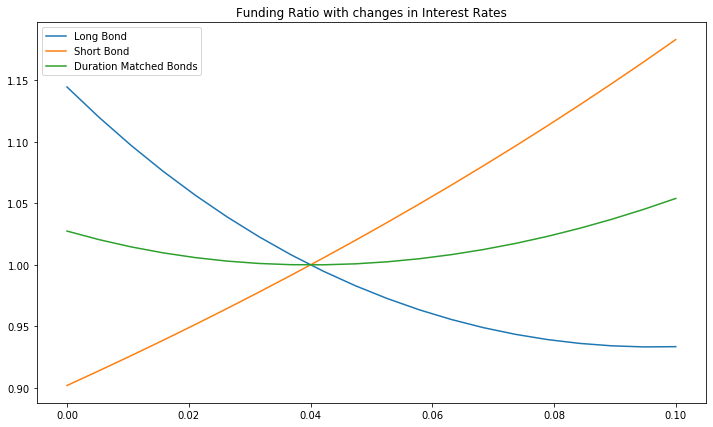

In [66]:
# group of interest rates
rates = np.linspace(0,0.1,20)

# a Long-term assset Portfolio without short-term assets
lb_asset = a_0*long_bond/p_long
# a Short-term assset Portfolio without long-term assets
sb_asset = a_0*short_bond/p_short

# Calculate Funding ratios for different interest rates and store it in df
fr_changes = pd.DataFrame({
    "Long Bond": [ash.funding_ratio(lb_asset,liabilities,rate) for rate in rates],
    "Short Bond": [ash.funding_ratio(sb_asset,liabilities,r) for r in rates],
    "Duration Matched Bonds" : [ash.funding_ratio(p_flows,liabilities,r) for r in rates]
}, index = rates)

# plot to see changes
fr_changes.plot(title = "Funding Ratio with changes in Interest Rates",figsize =(12,7));